___
# Projeto 01 - Ciência dos Dados - IDH, SUICÍDIOS E INTERNET
___


**Aluno:** Lucas Muchaluat Moreira - Turma B




# Introdução
O dia a dia de uma população do século XXI está muito atrelada à navegação na internet. Novas formas de comunicação como e-mail, Facebook, WhatsApp, etc, são alguns dos exemplos mais claros de que nossas vidas foram totalmentes transformadas por ela, tanto no quesito comunicação, quanto em termos de praticidade. Ou seja, é inegável o quanto a internet é importante em nossas vidas, criando sempre novas oportunidades e esbanjando sua praticidade ao máximo. Porém, há um lado negativo: a exclusão social... De acordo com a OMS (Organização Mundial da Saúde), dentre as principais causas de suícidio, atualmente, estão a depressão e o cyber-bullying, ambas fortemente relacionadas ao uso significante da internet, mais precisamente ao contexto das redes sociais. É relevante ressaltar também que de 10 pessoas que tem pensamentos suícidas, 8 acabam efetivamente cometendo o ato. Portanto, nada mais válido que tentar estabelecer uma correlação entre a quantidade de suicídios e de usuários de internet, visando explicar uma pela outra, seus motivos e relações. Fora isso, percebeu-se que para uma conclusão mais precisa, seria necessário a análise em função do IDH da população de cada país, já que cada região global tem suas próprias características e peculiaridades. Isto é, pelo fato de muitas pessoas não terem acesso à internet, será avaliado os efeitos, do ponto de vista tecnológico, de uma exclusão digital.

**Variáveis escolhidas (todas retiradas de www.gapminder.org):**

- IDH (Índice de Desenvolvimento Humano) - Calculado por meio da educação, longevidade e renda
- Usuários de Internet
- Quantidade de Suícidios


**Pergunta:** Em países de maior IDH a quantidade de suicídios é inferior a de países com menor IDH? Será que isso tem a ver com a quantidade de usuários de internet?

In [31]:
#importando bibliotecas
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [32]:
#Leitura do arquivo IDH - excel do gapminder
idh = pd.read_excel('hdi_human_development_index.xlsx')
idh.head()

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


In [33]:
#Leitura do arquivo USUÁRIOS DE INTERNET - excel do gapminder
internet = pd.read_excel('internet_users.xlsx')
internet.head()

,geo,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.84,3.55,4.0,5.0,5.45,5.9,7.0,8.26,10.6
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.00,23.90,41.20,45.0,49.0,54.70,57.2,60.1,63.30,66.4
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.45,10.20,11.20,12.5,14.9,18.20,22.5,29.5,38.20,42.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.90,70.00,78.50,81.0,81.0,86.40,94.0,95.9,96.90,97.9
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.70,1.90,2.30,2.8,3.1,6.50,8.9,10.2,12.40,13.0


In [34]:
#Leitura do arquivo SUICÍDIO - excel do gapminder
suicidio = pd.read_excel('suicide_total_deaths.xlsx')
suicidio.head()

,geo,2002,2003,2004
0,Afghanistan,1490,NaN,1510
1,Albania,82,NaN,238
2,Algeria,897,NaN,1170
3,Andorra,5,NaN,5
4,Angola,1070,NaN,1580


In [35]:
#fazendo os recortes necessários da tabela de IDH (p/ manter analise coerente com os dados da coluna)
idh_2004 = idh.loc[:, ["geo", 2004]]
idh_2004.head()

,geo,2004
0,Afghanistan,0.396
1,Albania,0.685
2,Algeria,0.680
3,Andorra,NaN
4,Angola,0.426


In [36]:
#fazendo os recortes necessários da tabela de mortes no transito (p/ manter analise coerente com os dados da coluna)
internet_2004 = internet.loc[:, ["geo", 2004]]
internet_2004.head()

,geo,2004
0,Afghanistan,0.106
1,Albania,2.420
2,Algeria,4.630
3,Andorra,26.800
4,Angola,0.465


In [37]:
#fazendo os recortes necessários da tabela de suicídios (p/ manter analise coerente com os dados da coluna)
suicidio_2004 = suicidio.loc[:, ["geo", 2004]]
suicidio_2004.head()

,geo,2004
0,Afghanistan,1510
1,Albania,238
2,Algeria,1170
3,Andorra,5
4,Angola,1580


In [38]:
#convertendo o indice de idh para que seja o mesmo no join
idh_idx = idh_2004.set_index("geo")
idh_idx.head()

,2004
geo,
Afghanistan,0.396
Albania,0.685
Algeria,0.680
Andorra,NaN
Angola,0.426


In [39]:
#convertendo os outros indices para que sejam os mesmos no join
internet_idx = internet_2004.set_index("geo")
suicidio_idx = suicidio_2004.set_index("geo")

In [40]:
#dando join nas tabelas por meio do ano - IDH X MORTES NO TRANSITO
df = idh_idx.join(internet_idx, how='inner', lsuffix='_idh', rsuffix='_internet')
df.head()

,2004_idh,2004_internet
geo,,
Afghanistan,0.396,0.106
Albania,0.685,2.420
Algeria,0.680,4.630
Andorra,NaN,26.800
Angola,0.426,0.465


In [41]:
#dando join nas tabelas por meio do ano - ADICIONANDO SUICIDIOS
data = df.join(suicidio_idx, how='inner')
data.head()

,2004_idh,2004_internet,2004
geo,,,
Afghanistan,0.396,0.106,1510
Albania,0.685,2.420,238
Algeria,0.680,4.630,1170
Andorra,NaN,26.800,5
Angola,0.426,0.465,1580


In [42]:
#alterando nome da coluna suicidio para que facilite o entendimento
data.rename(columns={data.columns[-1]:'2004_suicidio'}, inplace=True)
data.head()

,2004_idh,2004_internet,2004_suicidio
geo,,,
Afghanistan,0.396,0.106,1510
Albania,0.685,2.420,238
Algeria,0.680,4.630,1170
Andorra,NaN,26.800,5
Angola,0.426,0.465,1580


In [43]:
data=data.dropna(axis=0)
data.head()

,2004_idh,2004_internet,2004_suicidio
geo,,,
Afghanistan,0.396,0.106,1510
Albania,0.685,2.420,238
Algeria,0.680,4.630,1170
Angola,0.426,0.465,1580
Argentina,0.780,16.000,3590


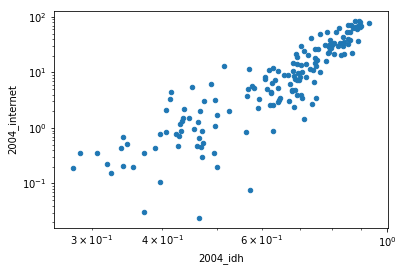

In [44]:
#testando o plot do grafico de dispersao com log
data.plot.scatter(x="2004_idh", y = "2004_internet", loglog=True)

In [45]:
#definindo a funcao que traçará a reta de tendência sobre dispersão 
def reta(dados_x, dados_y, nome_x, nome_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre ',nome_x,'  e ',nome_y,':')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(nome_x + " versus "+ nome_y)
    plt.xlabel(nome_x)
    plt.ylabel(nome_y)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()

In [46]:
#alteração para a escala log caso seja necessário mais pra frente
data["2004_idh_log"] = np.log(data["2004_idh"])
data["2004_internet_log"] = np.log(data["2004_internet"])
data["2004_suicidio_log"] = np.log(data["2004_suicidio"])

Ajuste linear entre  IDH   e  Usuários de Internet :
Coeficiente linear: -4.427739339976656
Coeficiente angular: 9.582500427493427


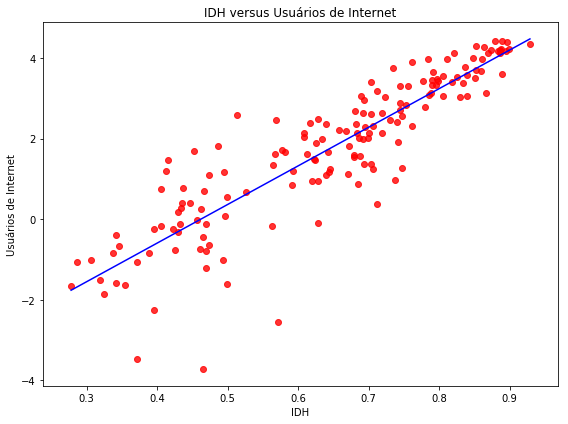

In [47]:
reta(data["2004_idh"], data["2004_internet_log"], "IDH", "Usuários de Internet") #USAR OU NAO USAR LOG?

Ajuste linear entre  IDH   e  Suicídios :
Coeficiente linear: 5243.346492108279
Coeficiente angular: -186.46466198281354


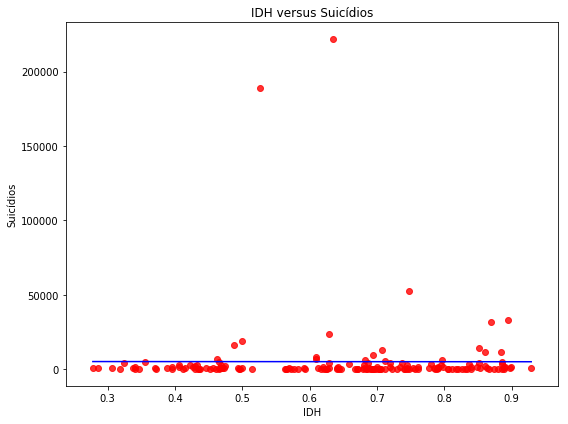

In [48]:
reta(data["2004_idh"], data["2004_suicidio"], "IDH", "Suicídios") #USAR OU NAO USAR LOG?

Ajuste linear entre  Usuários de Internet   e  Suicídios :
Coeficiente linear: 6.100709418613746
Coeficiente angular: 0.007470387568414379


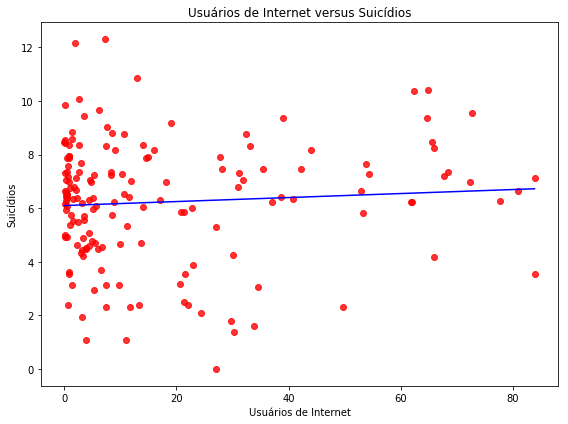

In [49]:
reta(data["2004_internet"], data["2004_suicidio_log"], "Usuários de Internet", "Suicídios") #USAR OU NAO USAR LOG?

In [50]:
data.corr()

,2004_idh,2004_internet,2004_suicidio,2004_idh_log,2004_internet_log,2004_suicidio_log
2004_idh,1.000000,0.764869,-0.001349,0.989766,0.888533,-0.011280
2004_internet,0.764869,1.000000,-0.024411,0.696069,0.786198,0.072618
2004_suicidio,-0.001349,-0.024411,1.000000,0.011765,0.003957,0.432488
2004_idh_log,0.989766,0.696069,0.011765,1.000000,0.874860,-0.028568
2004_internet_log,0.888533,0.786198,0.003957,0.874860,1.000000,-0.055959
2004_suicidio_log,-0.011280,0.072618,0.432488,-0.028568,-0.055959,1.000000


Ao analisarmos a tabela de correlações percebemos níveis de correlação muito baixas entre os gráficos que envolvem a coluna suicídios...

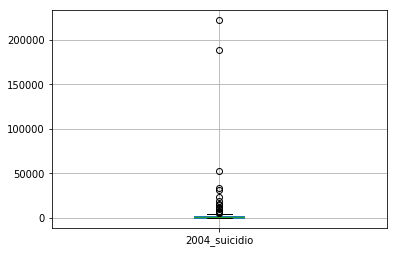

In [51]:
#plotando o box plot da coluna de suicidios
data.boxplot(column=['2004_suicidio']);

Nesse boxplot percebe-se que não há uma mediana clara de suícidios por ano. Além de que não há uma diferença entre o 1o e 3o quantis. Por fim, há dois outliers que se destacam perante os outros por apresentarem uma quantidade de suicidios altamente superior a da maioria dos países.

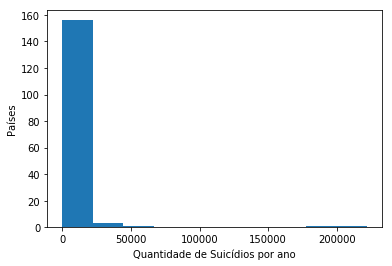

In [52]:
#comprovando os outliers observados no boxplot
plt.hist(data['2004_suicidio']);
plt.xlabel("Quantidade de Suicídios por ano");
plt.ylabel("Países");

Neste histograma percebe-se facilmente a assimetria pra direita do mesmo. Fica claro a existência de poucos países com uma alta quantidade de suicídios.

**Interpretando os outliers e a baixa taxa de correlação:** Em ambos os gráficos acima é possível notar que apenas dois países se destacam muito dos demais, com indices de suicidio superiores a 175k/ano. Sendo estes os outliers da variável, Índia e China. Ambos apresentam uma população superior aos demais, apresentando consequentemente, uma taxa maior dos mesmos. Fora isso, em ambos analisados existe um misto de estresse crônico, pobreza, violência conjugal e falta de tabus sociais ou religiosos sobre o suicídio, como conclui a pesquisa da BBC Brasil.

**Conclusão:** Após analisar os gráficos e a tabela, foi possível perceber que apesar do IDH do país explicar a quantidade de usuários de internet, a quantidade de suícidios não pode ser explicada por nenhuma váriavel escolhida. Visto que, a quantidade de suicídios não varia de acordo com o IDH  de cada país, explicando a grande quantidade de outliers no boxplot e a baixa taxa de correlação na tabela. Assim, pode-se dizer que quanto maior o IDH do país, mais usuários de internet o mesmo terá (taxa de correlação relativamente alta para ambas as variáveis), porém o mesmo não pode ser dito para a quantidade de suícidios, visto que ela não pode ser explicada nem pelo IDH, nem pela quantidade de usuários de internet, diferente do que nossa hipótese previa.

In [53]:
#salvando o arquivo em csv
data.to_csv('projeto1_lmm.csv')